In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('PJME_hourly.csv')
df.dtypes

Datetime     object
PJME_MW     float64
dtype: object

In [3]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.sort_index(ascending= False)

,PJME_MW
Datetime,
2018-08-03 00:00:00,35486.0
2018-08-02 23:00:00,38500.0
2018-08-02 22:00:00,41552.0
2018-08-02 21:00:00,43256.0
2018-08-02 20:00:00,44057.0
...,...
2002-01-01 05:00:00,28057.0
2002-01-01 04:00:00,27899.0
2002-01-01 03:00:00,28357.0


Text(0.5, 0, 'Energy Consumption in MW')

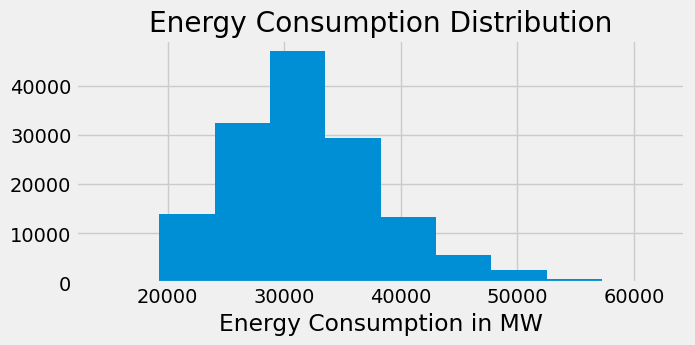

In [27]:
plt.figure(figsize=(7, 3))
plt.hist(df['PJME_MW'], bins= 10)
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption in MW')

In [4]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


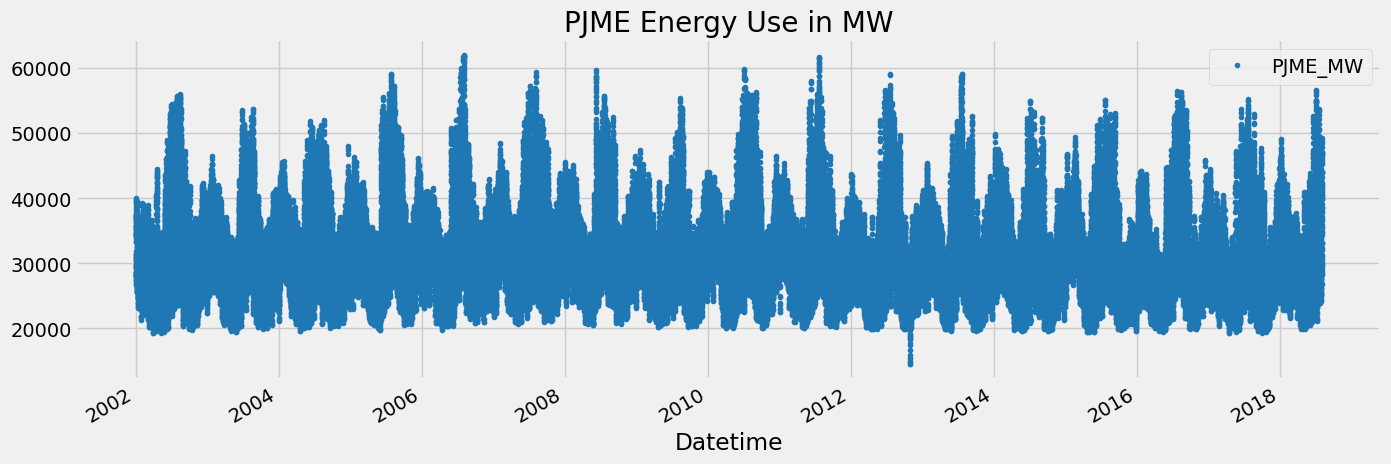

In [5]:
df.plot(style= '.',
        figsize=(15, 5),
        color = color_pal[0],
        title= 'PJME Energy Use in MW'
)
plt.show()

In [6]:
df.index.max(), df.index.min()

(Timestamp('2018-08-03 00:00:00'), Timestamp('2002-01-01 01:00:00'))

In [7]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

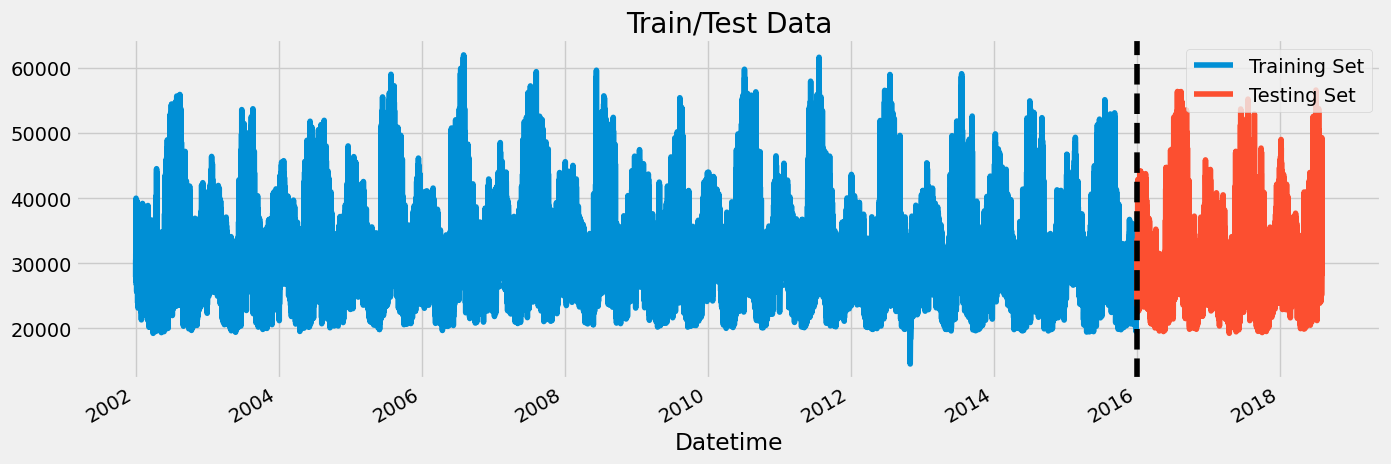

In [8]:
fig, ax= plt.subplots(figsize= (15, 5))
train.plot(ax=ax, label= 'Training Set', title= 'Train/Test Data')
test.plot(ax=ax, label= 'Testing Set')
ax.axvline('01-01-2016', color= 'black', ls= '--')
ax.legend(['Training Set', 'Testing Set'])
plt.show()


Text(0.5, 1.0, 'Week of Data')

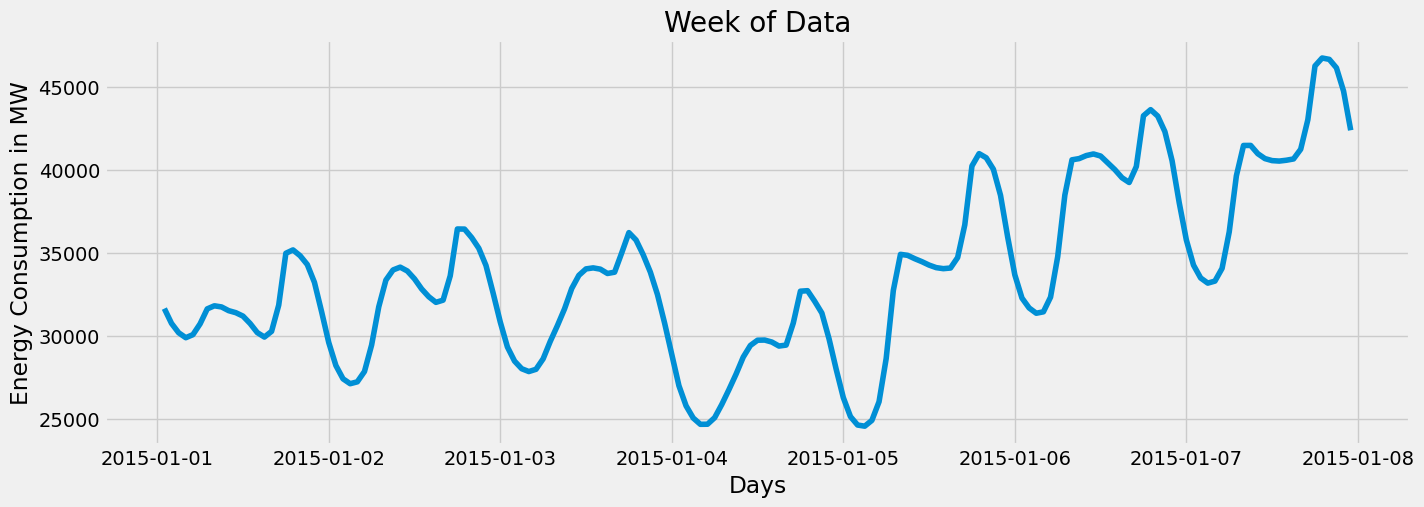

In [9]:
WOD = df.loc[(df.index > '01-01-2015') & (df.index < '01-08-2015')] # Week of Data
WOD = WOD.sort_index()
plt.figure(figsize= (15, 5))
plt.plot(WOD)
plt.xlabel('Days')
plt.ylabel('Energy Consumption in MW')
plt.title('Week of Data')


In [10]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [11]:
df_TS = create_features(df)
df_TS.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


In [12]:
def time_distribution_box(df, target):
    fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(30, 60))
    
    sns.boxplot(data=df, x='hour', y=target, ax=ax[0], palette='Blues')
    ax[0].set_title('Hour')

    sns.boxplot(data=df, x='dayofweek', y=target, ax=ax[1], palette='Blues')
    ax[1].set_title('Day Of Week')

    sns.boxplot(data=df, x='dayofmonth', y=target, ax=ax[2], palette='Blues')
    ax[2].set_title('Day Of Month')

    sns.boxplot(data=df, x='dayofyear', y=target, ax=ax[3], palette='Blues')
    ax[3].set_title('Day Of Year')

    sns.boxplot(data=df, x='weekofyear', y=target, ax=ax[4], palette='Blues')
    ax[4].set_title('Week Of Year')

    sns.boxplot(data=df, x='month', y=target, ax=ax[5], palette='Blues')
    ax[5].set_title('Month')

    sns.boxplot(data=df, x='quarter', y=target, ax=ax[6], palette='Blues')
    ax[6].set_title('Quarter')

    sns.boxplot(data=df, x='year', y=target, ax=ax[7], palette='Blues')
    ax[7].set_title('Year')

    plt.tight_layout()
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_5976\2444455950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y=target, ax=ax[0], palette='Blues')
C:\Users\User\AppData\Local\Temp\ipykernel_5976\2444455950.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofweek', y=target, ax=ax[1], palette='Blues')
C:\Users\User\AppData\Local\Temp\ipykernel_5976\2444455950.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofmonth', y=target, ax=ax[2], palette='Blues')
C:\Users\User\AppData\Local\Temp\i

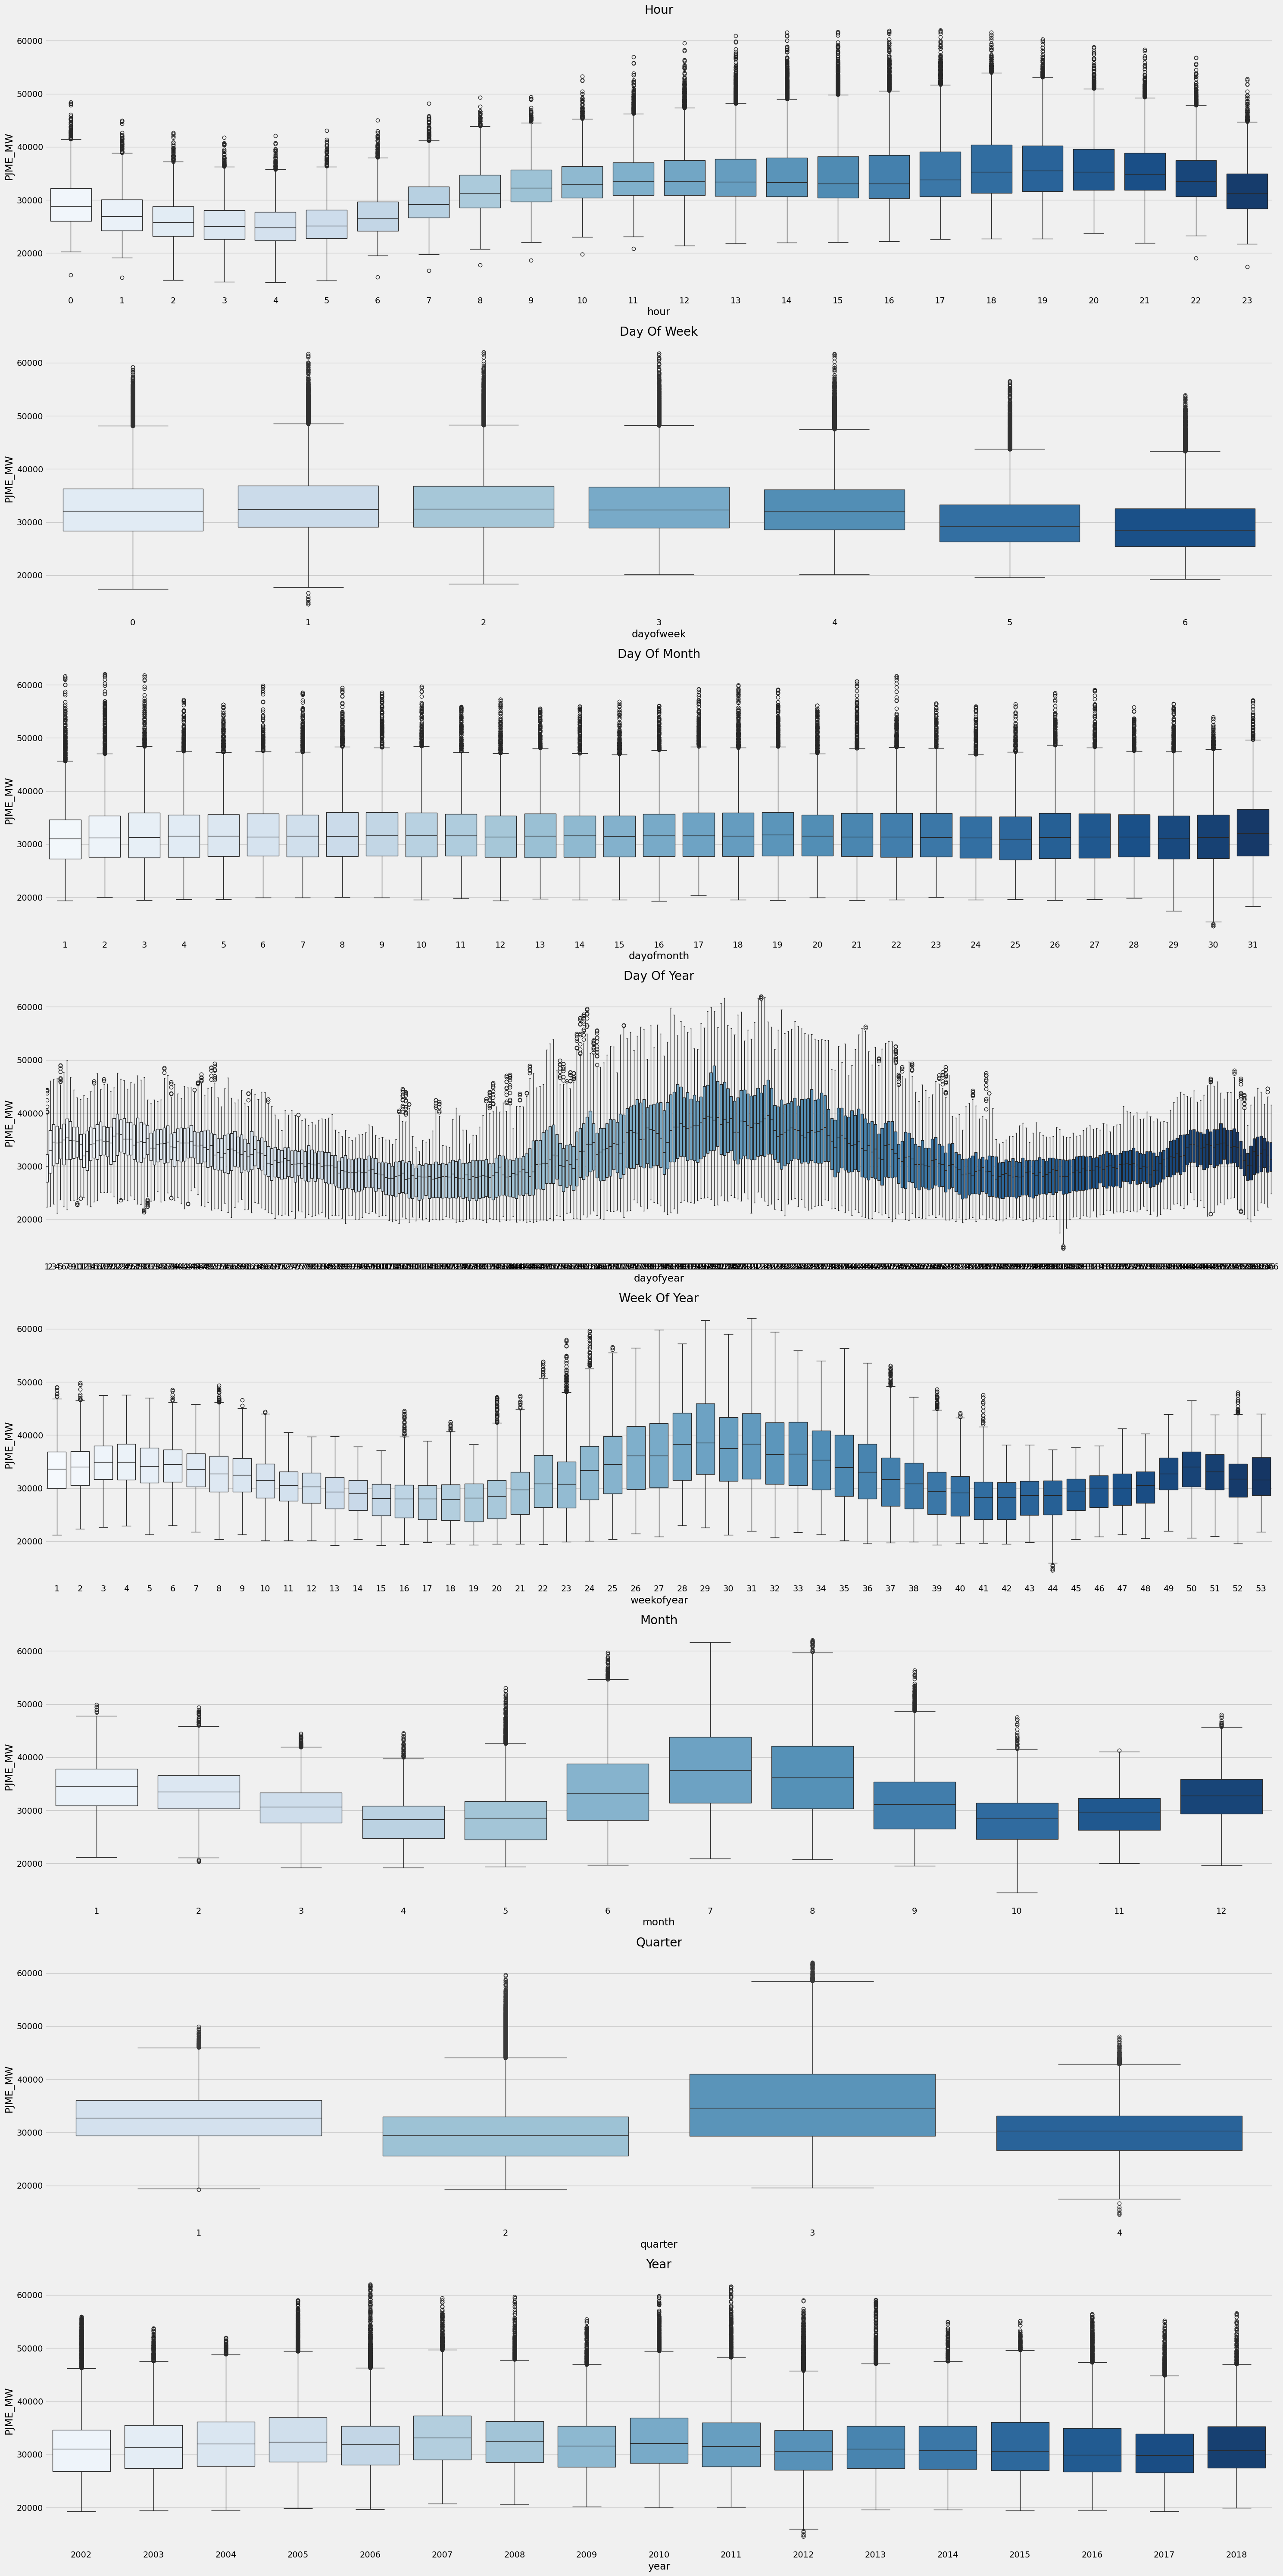

In [13]:
time_distribution_box(df_TS, 'PJME_MW')

In [14]:
"""
these two figures are from a dataset for energy consumption. I came up with the following

from the plot titled as Hour:
1- energy consumption is low from midnight till 5 AM as most of the public are sleeping during this time.
2- it reaches a moderate level throughout the day till we reach the interval from 16 to 19, you will notice that the third quartile and IQR will increase gradually till they reach their peak at 18 as people start to get back home and use their devices which seems to consume more than what they consume during work or study.
3- It decreases gradually as they start to get to sleep.

from the plot titled Day Of Week:
1- We have almost the same distribution, and consumption during the working days.
2- a slight decrease during weekend (day 5 and 6) as most of the companies and shops are closed.

From the plots Day Of Year and Week Of Year:
1- they have almost the same shape of distribution which makes the plot for Day Of Year not necessary ( just my opinion)
2- their are two slightly high peak at the beginning and the end of the years as the weather is cold and heating units are working to get water and spaces wormer.
3- highest peaks are at summer from week 26 to week 36 with almost no outliers which may result in high predictability while builidng our models
4- this highest peak is because of the use of AC units.

from the plot titles Month:
1- the slight peak is obvious at months 12, 1, 2 because of the cold weather.
2- summer peaks are at 6, 7, 8 with its highest peak at 7. 
3- months 12, 1, 2, and 8 are having very low number of outliers.
4- month number 7 has no outliers at all which gives it the highest predictability.

"""

'\nthese two figures are from a dataset for energy consumption. I came up with the following\n\nfrom the plot titled as Hour:\n1- energy consumption is low from midnight till 5 AM as most of the public are sleeping during this time.\n2- it reaches a moderate level throughout the day till we reach the interval from 16 to 19, you will notice that the third quartile and IQR will increase gradually till they reach their peak at 18 as people start to get back home and use their devices which seems to consume more than what they consume during work or study.\n3- It decreases gradually as they start to get to sleep.\n\nfrom the plot titled Day Of Week:\n1- We have almost the same distribution, and consumption during the working days.\n2- a slight decrease during weekend (day 5 and 6) as most of the companies and shops are closed.\n\nFrom the plots Day Of Year and Week Of Year:\n1- they have almost the same shape of distribution which makes the plot for Day Of Year not necessary ( just my opin

In [29]:
df_TS.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [30]:
# Make Your Model

train = create_features(train)
test = create_features(test)

features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear']

target = ['PJME_MW']

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [34]:
reg = xgb.XGBRegressor(n_estimators = 1000, base_score = 0.5,
                       booster = 'gbtree',
                       early_stopping_rounds = 50,
                       objective = 'reg:linear',
                       max_depth = 3,
                       learning_rate = 0.01)

reg.fit(x_train, y_train, 
        eval_set = [(x_train, y_train), (x_test, y_test)],
        verbose= 50)

[0]	validation_0-rmse:32567.35644	validation_1-rmse:31498.01001


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:26:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[50]	validation_0-rmse:20037.95337	validation_1-rmse:18986.18087
[100]	validation_0-rmse:12577.25114	validation_1-rmse:11601.84369
[150]	validation_0-rmse:8247.58734	validation_1-rmse:7428.41064
[200]	validation_0-rmse:5849.36597	validation_1-rmse:5278.01973
[250]	validation_0-rmse:4577.19548	validation_1-rmse:4349.12878
[300]	validation_0-rmse:3946.23970	validation_1-rmse:4016.94344
[350]	validation_0-rmse:3640.04120	validation_1-rmse:3936.36740
[400]	validation_0-rmse:3476.82837	validation_1-rmse:3913.82412
[450]	validation_0-rmse:3377.18060	validation_1-rmse:3906.43292
[500]	validation_0-rmse:3313.21838	validation_1-rmse:3906.04870
[510]	validation_0-rmse:3303.52715	validation_1-rmse:3905.33394


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

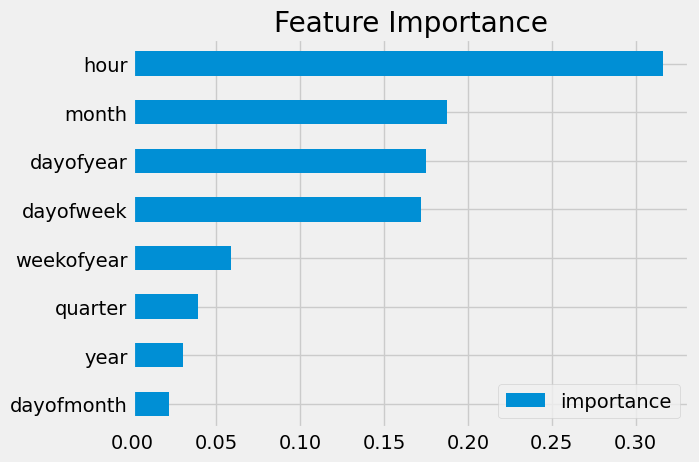

In [35]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [36]:
features

['hour',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear']

In [37]:
features_01 = ['hour',
 'dayofweek',
 'month',
 'dayofyear',
 'weekofyear']

In [40]:
x_train = train[features_01]
y_train = train[target]

x_test = test[features_01]
y_test = test[target]

In [41]:
reg = xgb.XGBRegressor(n_estimators = 1000, base_score = 0.5,
                       booster = 'gbtree',
                       early_stopping_rounds = 50,
                       objective = 'reg:linear',
                       max_depth = 3,
                       learning_rate = 0.01)

reg.fit(x_train, y_train, 
        eval_set = [(x_train, y_train), (x_test, y_test)],
        verbose= 50)

[0]	validation_0-rmse:32567.35644	validation_1-rmse:31498.01001


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:36:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[50]	validation_0-rmse:20039.90769	validation_1-rmse:18995.70612
[100]	validation_0-rmse:12575.79794	validation_1-rmse:11607.33378
[150]	validation_0-rmse:8246.28362	validation_1-rmse:7433.43998
[200]	validation_0-rmse:5847.47762	validation_1-rmse:5284.61297
[250]	validation_0-rmse:4578.75073	validation_1-rmse:4320.20215
[300]	validation_0-rmse:3950.66538	validation_1-rmse:3965.29933
[350]	validation_0-rmse:3649.95609	validation_1-rmse:3866.12017
[400]	validation_0-rmse:3498.75672	validation_1-rmse:3847.81397
[450]	validation_0-rmse:3412.98017	validation_1-rmse:3845.73943
[500]	validation_0-rmse:3360.73791	validation_1-rmse:3848.01289
[524]	validation_0-rmse:3341.37249	validation_1-rmse:3848.79133


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [48]:
test['prediction'] = reg.predict(x_test)
df_boost = df_TS.merge(test[['prediction']], how= 'left', left_index= True, right_index= True)
df_boost.tail()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
Datetime,,,,,,,,,,
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1,36806.171875
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1,36806.171875
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1,35985.523438
2018-01-01 23:00:00,40164.0,23,0,1,1,2018,1,1,1,33907.300781
2018-01-02 00:00:00,38608.0,0,1,1,1,2018,2,2,1,30714.130859


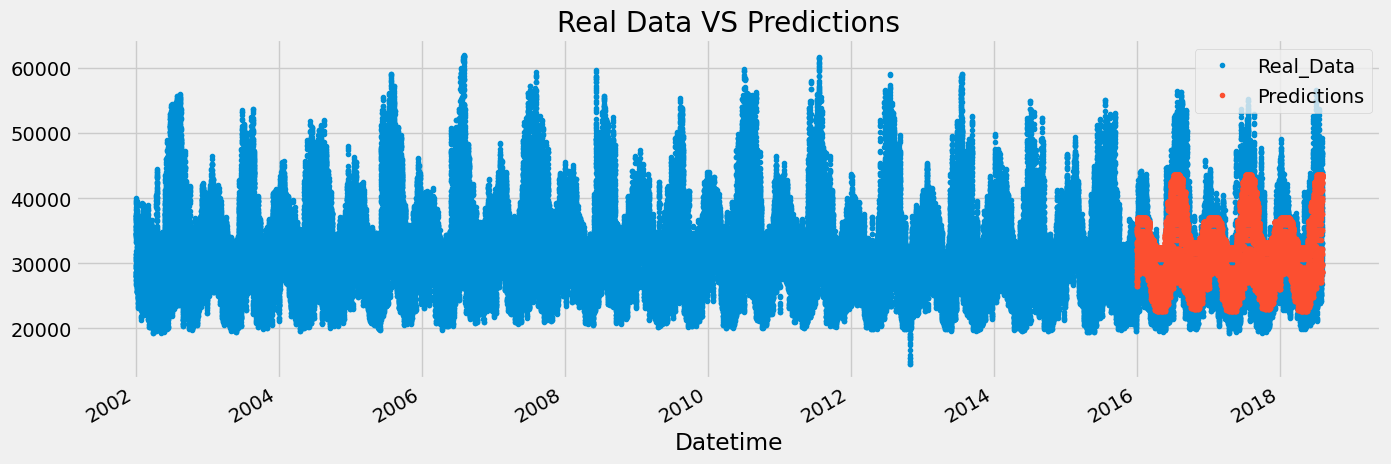

In [49]:
fig, ax = plt.subplots(figsize= (15, 5))
df_boost['PJME_MW'].plot(ax=ax, style= '.')
df_boost['prediction'].plot(ax=ax, style='.')
plt.title('Real Data VS Predictions')
plt.legend(['Real_Data', 'Predictions'])
plt.show()


In [51]:
error_score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(error_score)

3844.010977678001
